**Case Study Data Mining: Aplikasi model Klasifikasi**

Anggota Kelompok 1

Andri

Annisa

Audrey (2106724864)

Rifqi

Tsabita

Domain Knowledge & Data Understanding:
- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara legal dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax.

Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)
- Buatlah sebuah laporan Analisa Data tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari Voyant Tools) maka jangan load local file, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di Google Colab, "Error Free", dan TIDAK PERLU REQUEST ACCESS (bisa dibuka oleh umum/public).

# Import Data

In [21]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4701 non-null   int64 
 1   label             4701 non-null   int64 
 2   tanggal           4701 non-null   object
 3   judul             4701 non-null   object
 4   narasi            4701 non-null   object
 5   nama file gambar  4701 non-null   object
dtypes: int64(2), object(4)
memory usage: 220.5+ KB


In [ ]:
data['label'].value_counts()

1    3850
0     851
Name: label, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

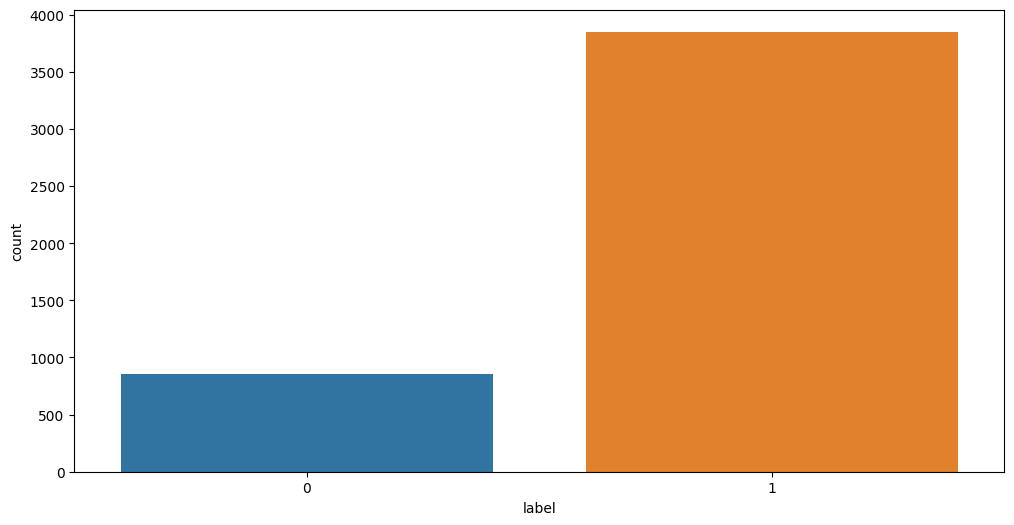

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'label', data = data)

In [ ]:
data

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,Banser-PDIP Berdamai,Ratusan massa dari Barisan Serba Guna (Banser)...,988471.png
4697,991611,1,23-Jul-20,ERDOGAN TAK MAU DUDUK DI KURSI TAMU YANG LEBIH...,ERDOGAN DATANG KE VATIKAN MENJUMPAI BABA (POP)...,991611.png
4698,992733,1,1-Apr-20,"Imigran China Sengaja Membawa Virus, Tujuannya...",IMIGRAN CN SENGAJA MEMBAWA VIRUS DAN MEREKA TE...,992733.jpg
4699,995077,1,5-Mar-19,BUKTI KECURANGAN JOKOWI BAGI SEMBAKO,Beredar dimana mana jadi VIRAL video ini\nApa ...,995077.png


In [ ]:
data.isna().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [5]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [6]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Preprocessing

##Tokenisasi

In [8]:
import string
import re #untuk regular expression
import nltk
nltk.download('punkt')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
#remove unnneccesary characters
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ",text)
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

# remove semua karakter terkait html: unescape html eg. &nbsp; &amp; | link/url | tag html
import html
def remove_html(text):
    text = html.unescape(text)
    tag_pattern = re.compile(r'<.*?>')
    text = tag_pattern.sub(r'',text)
    regex_str = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    url_pattern = re.compile(regex_str)
    text = url_pattern.sub(r'', text)
    return text

 #Remove punctuations, links, mentions and \r\n new line characters
def remove_all_entities(text):
    text = text.lower()
    text = re.sub(r'(\w)(\1{2,})', r"\1", text) # will replace repeated char
    text = text.replace('\\r', ' ').replace('\\n', ' ') #remove \n and \r
    text = re.sub(r"\S*@\S*\s?", " ", text) #remove email
    text = re.sub(r"(?:\@|https?\://)\S+", " ", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = text.translate(text.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text = ' '.join(word for word in text.split() if not word.isnumeric()) #remove word only number
    text = re.sub(r'\b\w\b', " ", text) #remove one letter only
    text = re.sub("(username|user|url|rt)\s|\s(user|url|rt)"," ",text)
    text = re.sub(r'\b\d{8,14}\b',' ',text)
    text = re.sub(r'[\w._%+-]+@[\w\.-]+\.[a-zA-Z]{2,4}'," ",text)
    text = re.sub(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'," ",text)
    text = ' '.join(word for word in text.split() if len(word) < 21) # remove words longer than 21 characters
    text = ' '.join(word for word in text.split() if len(word) > 1) # remove words contain single letter only
    return text

#remove number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

#remove punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans(" "," ",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

# cleaning non alpha-numeric
def remove_non_alphanumeric(text):
    return re.sub(r'[^\w]'," ",text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [23]:
data['judul']=data['judul'].str.lower()
data['narasi']=data['narasi'].str.lower()

In [24]:
data['tokenized_judul'] = data['judul'].apply(remove_tweet_special)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_html)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_all_entities)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_number)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_punctuation)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_whitespace_LT)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_whitespace_multiple)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_singl_char)
data['tokenized_judul'] = data['tokenized_judul'].apply(remove_non_alphanumeric)
data['tokenized_judul'] = data['tokenized_judul'].apply(word_tokenize_wrapper)

In [25]:
data['tokenized_narasi'] = data['narasi'].apply(remove_tweet_special)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_html)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_all_entities)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_number)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_punctuation)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_whitespace_LT)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_whitespace_multiple)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_singl_char)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(remove_non_alphanumeric)
data['tokenized_narasi'] = data['tokenized_narasi'].apply(word_tokenize_wrapper)

In [26]:
def freqDist_wrapper(text):
    return FreqDist(text)

data['tokenized_judul_freq'] = data['tokenized_judul'].apply(freqDist_wrapper)
data['tokenized_narasi_freq'] = data['tokenized_narasi'].apply(freqDist_wrapper)

In [27]:
data

,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,tokenized_judul_freq,tokenized_narasi_freq
0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, to, radio, talk, show, recently, shar...","{'pemakaian': 1, 'masker': 1, 'menyebabkan': 1...","{'caller': 1, 'to': 3, 'radio': 1, 'talk': 1, ..."
1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[yth, seluruh, anggota, grup, sesuai, instruks...","{'instruksi': 1, 'gubernur': 1, 'jateng': 1, '...","{'yth': 1, 'seluruh': 1, 'anggota': 1, 'grup':..."
2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[jokowi, adalah, presiden, terbaik, dlm, sejar...","{'foto': 1, 'jim': 1, 'rohn': 1, 'jokowi': 1, ...","{'jokowi': 1, 'adalah': 1, 'presiden': 1, 'ter..."
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[maaf, mas, dan, mbak, ini, bukan, politik, ta...","{'ini': 1, 'bukan': 1, 'politik': 1, 'tapi': 1...","{'maaf': 1, 'mas': 1, 'dan': 1, 'mbak': 1, 'in..."
4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin]","{'foto': 2, 'kadrun': 1, 'kalo': 1, 'lihat': 1...","{'kadrun': 1, 'kalo': 1, 'lihat': 1, 'foto': 1..."
...,...,...,...,...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,banser-pdip berdamai,ratusan massa dari barisan serba guna (banser)...,988471.png,"[banser, pdip, berdamai]","[ratusan, massa, dari, barisan, serba, guna, b...","{'banser': 1, 'pdip': 1, 'berdamai': 1}","{'ratusan': 1, 'massa': 1, 'dari': 1, 'barisan..."
4697,991611,1,23-Jul-20,erdogan tak mau duduk di kursi tamu yang lebih...,erdogan datang ke vatikan menjumpai baba (pop)...,991611.png,"[erdogan, tak, mau, duduk, di, kursi, tamu, ya...","[erdogan, datang, ke, vatikan, menjumpai, baba...","{'erdogan': 1, 'tak': 1, 'mau': 1, 'duduk': 1,...","{'erdogan': 4, 'datang': 2, 'ke': 1, 'vatikan'..."
4698,992733,1,1-Apr-20,"imigran china sengaja membawa virus, tujuannya...",imigran cn sengaja membawa virus dan mereka te...,992733.jpg,"[imigran, china, sengaja, membawa, virus, tuju...","[imigran, cn, sengaja, membawa, virus, dan, me...","{'imigran': 1, 'china': 1, 'sengaja': 1, 'memb...","{'imigran': 1, 'cn': 2, 'sengaja': 1, 'membawa..."
4699,995077,1,5-Mar-19,bukti kecurangan jokowi bagi sembako,beredar dimana mana jadi viral video ini\napa ...,995077.png,"[bukti, kecurangan, jokowi, bagi, sembako]","[beredar, dimana, mana, jadi, viral, video, in...","{'bukti': 1, 'kecurangan': 1, 'jokowi': 1, 'ba...","{'beredar': 1, 'dimana': 1, 'mana': 1, 'jadi':..."


##Stop Word

In [28]:
"""
Installing Modules & getting the necessary files for "Google Colab"
Jika dijalankan di komputer lokal (PC/Laptop) silahkan unduh secara manual dan
lakukan instalasi module di terminal/command prompt
"""
import nltk

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
nltk.download('popular')

mkdir: cannot create directory ‘data’: File exists
--2023-12-01 09:27:15--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-12-01 09:27:16 ERROR 404: Not Found.

--2023-12-01 09:27:16--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-12-01 09:27:16 ERROR 404: Not Found.

--2023-12-01 09:27:16--  https://raw.githubusercontent.com/taudata-indonesia/eLe

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [29]:
# Loading Stopwords: Ada beberapa cara
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()

list_stopwords_eng = stopwords.words('english')
list_stopwords_indo = stopwords.words('indonesian')

# append additional stopword
list_stopwords_indo.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen'])

list_stopwords_eng.extend(['u', 'nan', 'loh', 'rt',
                       '&amp', 'yah',"i", "me", "my", "myself", "we",
                       "our", "ours", "ourselves", "you", "your", "yours",
                       "yourself", "yourselves", "he", "him", "his", "himself",
                       "she", "her", "hers", "herself", "it", "its", "itself",
                       "they", "them", "their", "theirs", "themselves", "what",
                       "which", "who", "whom", "this", "that", "these", "those",
                       "am", "is", "are", "was", "were", "be", "been", "being",
                       "have", "has", "had", "having", "do", "does", "did",
                       "doing", "a", "an", "the", "and", "but", "if", "or",
                       "because", "as", "until", "while", "of", "at", "by",
                       "for", "with", "about", "against", "between", "into",
                       "through", "during", "before", "after", "above", "below",
                       "to", "from", "up", "down", "in", "out", "on", "off",
                       "over", "under", "again", "further", "then", "once",
                       "here", "there", "when", "where", "why", "how", "all",
                       "any", "both", "each", "few", "more", "most", "other",
                       "some", "such", "no", "nor", "not", "only", "own",
                       "same", "so", "than", "too", "very", "s", "t", "can",
                       "will", "just", "don", "should", "now"])

#convert list to dict
list_stopwords_indo = set(list_stopwords_indo)
list_stopwords_eng = set(list_stopwords_eng)

In [30]:
#remove stopword pada list token
def stopwords_removal_indo(words):
    return [word for word in words if word not in list_stopwords_indo]
def stopwords_removal_eng(words):
    return [word for word in words if word not in list_stopwords_eng]

In [31]:
data['judul_stopword_applied'] = data['tokenized_judul'].apply(stopwords_removal_indo)
data['narasi_stopword_applied'] = data['tokenized_narasi'].apply(stopwords_removal_indo)
data['judul_stopword_applied'] = data['judul_stopword_applied'].apply(stopwords_removal_eng)
data['narasi_stopword_applied'] = data['narasi_stopword_applied'].apply(stopwords_removal_eng)

In [32]:
data

,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,tokenized_judul_freq,tokenized_narasi_freq,judul_stopword_applied,narasi_stopword_applied
0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, to, radio, talk, show, recently, shar...","{'pemakaian': 1, 'masker': 1, 'menyebabkan': 1...","{'caller': 1, 'to': 3, 'radio': 1, 'talk': 1, ...","[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, radio, talk, show, recently, shared, ..."
1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[yth, seluruh, anggota, grup, sesuai, instruks...","{'instruksi': 1, 'gubernur': 1, 'jateng': 1, '...","{'yth': 1, 'seluruh': 1, 'anggota': 1, 'grup':...","[instruksi, gubernur, jateng, penilangan, berm...","[yth, anggota, grup, sesuai, instruksi, gubern..."
2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[jokowi, adalah, presiden, terbaik, dlm, sejar...","{'foto': 1, 'jim': 1, 'rohn': 1, 'jokowi': 1, ...","{'jokowi': 1, 'adalah': 1, 'presiden': 1, 'ter...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[jokowi, presiden, terbaik, dlm, sejarah, bang..."
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[maaf, mas, dan, mbak, ini, bukan, politik, ta...","{'ini': 1, 'bukan': 1, 'politik': 1, 'tapi': 1...","{'maaf': 1, 'mas': 1, 'dan': 1, 'mbak': 1, 'in...","[politik, kenyataan, jokowi, berhasil, memulan...","[maaf, mas, mbak, politik, kenyataan, jokowi, ..."
4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin]","{'foto': 2, 'kadrun': 1, 'kalo': 1, 'lihat': 1...","{'kadrun': 1, 'kalo': 1, 'lihat': 1, 'foto': 1...","[foto, kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,banser-pdip berdamai,ratusan massa dari barisan serba guna (banser)...,988471.png,"[banser, pdip, berdamai]","[ratusan, massa, dari, barisan, serba, guna, b...","{'banser': 1, 'pdip': 1, 'berdamai': 1}","{'ratusan': 1, 'massa': 1, 'dari': 1, 'barisan...","[banser, pdip, berdamai]","[ratusan, massa, barisan, serba, banser, kader..."
4697,991611,1,23-Jul-20,erdogan tak mau duduk di kursi tamu yang lebih...,erdogan datang ke vatikan menjumpai baba (pop)...,991611.png,"[erdogan, tak, mau, duduk, di, kursi, tamu, ya...","[erdogan, datang, ke, vatikan, menjumpai, baba...","{'erdogan': 1, 'tak': 1, 'mau': 1, 'duduk': 1,...","{'erdogan': 4, 'datang': 2, 'ke': 1, 'vatikan'...","[erdogan, duduk, kursi, tamu, kursi, baba, vat...","[erdogan, vatikan, menjumpai, baba, pop, vatik..."
4698,992733,1,1-Apr-20,"imigran china sengaja membawa virus, tujuannya...",imigran cn sengaja membawa virus dan mereka te...,992733.jpg,"[imigran, china, sengaja, membawa, virus, tuju...","[imigran, cn, sengaja, membawa, virus, dan, me...","{'imigran': 1, 'china': 1, 'sengaja': 1, 'memb...","{'imigran': 1, 'cn': 2, 'sengaja': 1, 'membawa...","[imigran, china, sengaja, membawa, virus, tuju...","[imigran, cn, sengaja, membawa, virus, menyunt..."
4699,995077,1,5-Mar-19,bukti kecurangan jokowi bagi sembako,beredar dimana mana jadi viral video ini\napa ...,995077.png,"[bukti, kecurangan, jokowi, bagi, sembako]","[beredar, dimana, mana, jadi, viral, video, in...","{'bukti': 1, 'kecurangan': 1, 'jokowi': 1, 'ba...","{'beredar': 1, 'dimana': 1, 'mana': 1, 'jadi':...","[bukti, kecurangan, jokowi, sembako]","[bere

##normalisasi

In [ ]:
# mengganti kata alay ke kata standar baku
# list slang dapat dari : https://medium.com/@arie.pratama.s/bahasa-indonesia-open-sourced-nlp-resources-8cb394193238

kamusalay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
kamusalay[['slang', 'formal']]

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,enggak taunya
15002,gtau,enggak tau
15003,gatau,enggak tau
15004,fans2,fan-fan


In [ ]:
katabaku_dict = {}

for index, row in kamusalay.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1]

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]

In [ ]:
data['judul_baku'] = data['judul_stopword_applied'].apply(normalized_term)
data['narasi_baku'] = data['narasi_stopword_applied'].apply(normalized_term)

In [ ]:
data

,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,tokenized_judul_freq,tokenized_narasi_freq,judul_stopword_applied,narasi_stopword_applied,judul_baku,narasi_baku
0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, to, radio, talk, show, recently, shar...","{'pemakaian': 1, 'masker': 1, 'menyebabkan': 1...","{'caller': 1, 'to': 3, 'radio': 1, 'talk': 1, ...","[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, radio, talk, show, recently, shared, ...","[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, radio, talk, show, recently, shared, ..."
1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[yth, seluruh, anggota, grup, sesuai, instruks...","{'instruksi': 1, 'gubernur': 1, 'jateng': 1, '...","{'yth': 1, 'seluruh': 1, 'anggota': 1, 'grup':...","[instruksi, gubernur, jateng, penilangan, berm...","[yth, seluruh, anggota, grup, sesuai, instruks...","[instruksi, gubernur, jateng, penilangan, berm...","[yth, seluruh, anggota, grup, sesuai, instruks..."
2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[jokowi, adalah, presiden, terbaik, dlm, sejar...","{'foto': 1, 'jim': 1, 'rohn': 1, 'jokowi': 1, ...","{'jokowi': 1, 'adalah': 1, 'presiden': 1, 'ter...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[jokowi, presiden, terbaik, dlm, sejarah, bang...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[jokowi, presiden, terbaik, dalam, sejarah, ba..."
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[maaf, mas, dan, mbak, ini, bukan, politik, ta...","{'ini': 1, 'bukan': 1, 'politik': 1, 'tapi': 1...","{'maaf': 1, 'mas': 1, 'dan': 1, 'mbak': 1, 'in...","[bukan, politik, kenyataan, pak, jokowi, berha...","[maaf, mas, mbak, bukan, politik, kenyataan, p...","[bukan, politik, kenyataan, pak, jokowi, berha...","[maaf, mas, mbak, bukan, politik, kenyataan, p..."
4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin]","{'foto': 2, 'kadrun': 1, 'kalo': 1, 'lihat': 1...","{'kadrun': 1, 'kalo': 1, 'lihat': 1, 'foto': 1...","[foto, kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]","[foto, kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,banser-pdip berdamai,ratusan massa dari barisan serba guna (banser)...,988471.png,"[banser, pdip, berdamai]","[ratusan, massa, dari, barisan, serba, guna, b...","{'banser': 1, 'pdip': 1, 'berdamai': 1}","{'ratusan': 1, 'massa': 1, 'dari': 1, 'barisan...","[banser, pdip, berdamai]","[ratusan, massa, barisan, serba, banser, kader...","[banser, pdip, berdamai]","[ratusan, massa, barisan, serba, banser, kader..."
4697,991611,1,23-Jul-20,erdogan tak mau duduk di kursi tamu yang lebih...,erdogan datang ke vatikan menjumpai baba (pop)...,991611.png,"[erdogan, tak, mau, duduk, di, kursi, tamu, ya...","[erdogan, datang, ke, vatikan, menjumpai, baba...","{'erdogan': 1, 'tak': 1, 'mau': 1, 'duduk': 1,...","{'erdogan': 4, 'datang': 2, 'ke': 1, 'vatikan'...","[erdogan, tak, mau, duduk, kursi, tamu, lebih,...","[erdogan, datang, vatikan, menjumpai, baba, po...","[erdogan, tak, mau, duduk, kursi, tamu, lebih,...","[erdogan, datang, vatikan, menjumpai, baba, po..."
4698,992733,1,1-Apr-20,"imigran china sengaja membawa virus, tujuannya...",imigran cn sengaja membawa

##lemmatization

In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=80d188ad9e638d167dab576c219f580f094deca1cbe0913751675ff64ce566e0
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
# import Sastrawi package
# pake swifter biar eksekusinya cepat

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

judul_term_dict = {}

for document in data['judul_baku']:
    for term in document:
        if term not in judul_term_dict:
            judul_term_dict[term] = ' '

for term in judul_term_dict:
    judul_term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe

def get_judul_stemmed_term(document):
    return [judul_term_dict[term] for term in document]

data['judul_stemmed'] = data['judul_baku'].swifter.apply(get_judul_stemmed_term)

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

In [ ]:
# import Sastrawi package
# pake swifter biar eksekusinya cepat

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

narasi_term_dict = {}

for document in data['narasi_baku']:
    for term in document:
        if term not in narasi_term_dict:
            narasi_term_dict[term] = ' '

for term in narasi_term_dict:
    narasi_term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe

def get_narasi_stemmed_term(document):
    return [narasi_term_dict[term] for term in document]

data['narasi_stemmed'] = data['narasi_baku'].swifter.apply(get_narasi_stemmed_term)

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

In [ ]:
data['judul_clean_string'] = data['judul_stemmed'].apply(lambda x : " ".join(x))
data['narasi_clean_string'] = data['narasi_stemmed'].apply(lambda x : " ".join(x))

In [ ]:
data.to_csv("Text_Preprocessing_notinclude_tfidf.csv")

#TF IDF

In [ ]:
import pandas as pd
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_notinclude_tfidf.csv")

In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

data['judul_list'] = data['judul_stemmed'].apply(convert_text_list)
data['narasi_list'] = data['narasi_stemmed'].apply(convert_text_list)

In [ ]:
def calc_TF_judul(document):
    # Counts the number of times the word appears in review
    TF_dict_judul = {}
    for term in document:
        if term in TF_dict_judul:
            TF_dict_judul[term] += 1
        else:
            TF_dict_judul[term] = 1
    # Computes tf for each word
    for term in TF_dict_judul:
        TF_dict_judul[term] = TF_dict_judul[term] / len(document)
    return TF_dict_judul

def calc_TF_narasi(document):
    # Counts the number of times the word appears in review
    TF_dict_narasi = {}
    for term in document:
        if term in TF_dict_narasi:
            TF_dict_narasi[term] += 1
        else:
            TF_dict_narasi[term] = 1
    # Computes tf for each word
    for term in TF_dict_narasi:
        TF_dict_narasi[term] = TF_dict_narasi[term] / len(document)
    return TF_dict_narasi

In [ ]:
data["TF_dict_judul"] = data['judul_list'].apply(calc_TF_judul)
data["TF_dict_narasi"] = data['narasi_list'].apply(calc_TF_narasi)

In [ ]:
def calc_DF_judul(tfDict):
    count_DF_judul = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF_judul:
                count_DF_judul[term] += 1
            else:
                count_DF_judul[term] = 1
    return count_DF_judul

def calc_DF_narasi(tfDict):
    count_DF_narasi = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF_narasi:
                count_DF_narasi[term] += 1
            else:
                count_DF_narasi[term] = 1
    return count_DF_narasi

In [ ]:
DFresult_judul = calc_DF_judul(data["TF_dict_judul"])
DFresult_narasi = calc_DF_narasi(data["TF_dict_narasi"])

In [ ]:
# cacl idf
n_document = len(data)

def calc_IDF_judul(__n_document, __DF):
    IDF_Dict_judul = {}
    for term in __DF:
        IDF_Dict_judul[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict_judul

def calc_IDF_narasi(__n_document, __DF):
    IDF_Dict_narasi = {}
    for term in __DF:
        IDF_Dict_narasi[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict_narasi

In [ ]:
#Stores the idf dictionary
IDFresult_judul = calc_IDF_judul(n_document, DFresult_judul)
IDFresult_narasi = calc_IDF_narasi(n_document, DFresult_narasi)

In [ ]:
#calc TF-IDF
def calc_TF_IDF_judul(TF):
    TF_IDF_Dict_judul = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict_judul[key] = TF[key] * IDFresult_judul[key]
    return TF_IDF_Dict_judul

def calc_TF_IDF_narasi(TF):
    TF_IDF_Dict_narasi = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict_narasi[key] = TF[key] * IDFresult_narasi[key]
    return TF_IDF_Dict_narasi

In [ ]:
data["TF-IDF_dict_judul"] = data["TF_dict_judul"].apply(calc_TF_IDF_judul)
data["TF-IDF_dict_narasi"] = data["TF_dict_narasi"].apply(calc_TF_IDF_narasi)

In [ ]:
positive_word = pd.read_csv('https://github.com/andrinau/postif-negativ-txt/raw/main/positive.txt')
negative_word = pd.read_csv('https://github.com/andrinau/postif-negativ-txt/raw/main/negative.txt')
kata_positive = positive_word['a+'].tolist()
kata_negative = negative_word['abnormal'].tolist()

In [ ]:
# cacl tf-idf total for positive word
def calc_positive_judul(TF_IDF_Dict_judul):
  total_judul = 0
  for key in TF_IDF_Dict_judul:
    if key in kata_positive:
      total_judul = total_judul + TF_IDF_Dict_judul[key]

  return total_judul

def calc_positive_narasi(TF_IDF_Dict_narasi):
  total_narasi = 0
  for key in TF_IDF_Dict_narasi:
    if key in kata_positive:
      total_narasi = total_narasi + TF_IDF_Dict_narasi[key]

  return total_narasi

In [ ]:
# cacl tf-idf total for negative word
def calc_negative_judul(TF_IDF_Dict_judul):
  total_judul = 0
  for key in TF_IDF_Dict_judul:
    if key in kata_negative:
      total_judul = total_judul + TF_IDF_Dict_judul[key]

  return total_judul

def calc_negative_narasi(TF_IDF_Dict_narasi):
  total_narasi = 0
  for key in TF_IDF_Dict_narasi:
    if key in kata_negative:
      total_narasi = total_narasi + TF_IDF_Dict_narasi[key]

  return total_narasi

In [ ]:
data["TF-IDF_positive_judul"] = data["TF-IDF_dict_judul"].apply(calc_positive_judul)
data["TF-IDF_negative_judul"] = data["TF-IDF_dict_judul"].apply(calc_negative_judul)
data["TF-IDF_positive_narasi"] = data["TF-IDF_dict_narasi"].apply(calc_positive_narasi)
data["TF-IDF_negative_narasi"] = data["TF-IDF_dict_narasi"].apply(calc_negative_narasi)

In [ ]:
conditions = [
    (data['TF-IDF_positive_judul'] < data['TF-IDF_negative_judul']),
    (data['TF-IDF_positive_judul'] > data['TF-IDF_negative_judul']),
    (data['TF-IDF_positive_judul'] == data['TF-IDF_negative_judul'])]
choices = ['negative','positive','neutral']

data['status_judul'] = np.select(conditions, choices)

conditions = [
    (data['TF-IDF_positive_narasi'] < data['TF-IDF_negative_narasi']),
    (data['TF-IDF_positive_narasi'] > data['TF-IDF_negative_narasi']),
    (data['TF-IDF_positive_narasi'] == data['TF-IDF_negative_narasi'])]
choices = ['negative','positive','neutral']

data['status_narasi'] = np.select(conditions, choices)

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict_judul"][index]:
    print('%20s' % key, "\t", data["TF_dict_judul"][index][key] ,"\t" , data["TF-IDF_dict_judul"][index][key])


print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict_narasi"][index]:
    print('%20s' % key, "\t", data["TF_dict_narasi"][index][key] ,"\t" , data["TF-IDF_dict_narasi"][index][key])

                term 	         TF 	              TF-IDF

         universitas 	 0.16666666666666666 	 0.9099663762450232
        muhammadiyah 	 0.16666666666666666 	 1.0626814982240491
              kupang 	 0.16666666666666666 	 1.1782060283173732
              bantah 	 0.16666666666666666 	 0.6538218396451457
         menginisasi 	 0.16666666666666666 	 1.2937305584106975
                gera 	 0.16666666666666666 	 0.969412200234812
                term 	         TF 	              TF-IDF

                kait 	 0.041666666666666664 	 0.17025344493987954
               salah 	 0.041666666666666664 	 0.14137231241654846
                satu 	 0.041666666666666664 	 0.12500872565276788
               dosen 	 0.041666666666666664 	 0.25240146909273997
                jadi 	 0.041666666666666664 	 0.08481398345320784
            insiator 	 0.041666666666666664 	 0.3234326396026744
                gera 	 0.08333333333333333 	 0.4363878921796608
           kabupaten 	 0.041666666666666664 

<Axes: xlabel='status_judul', ylabel='count'>

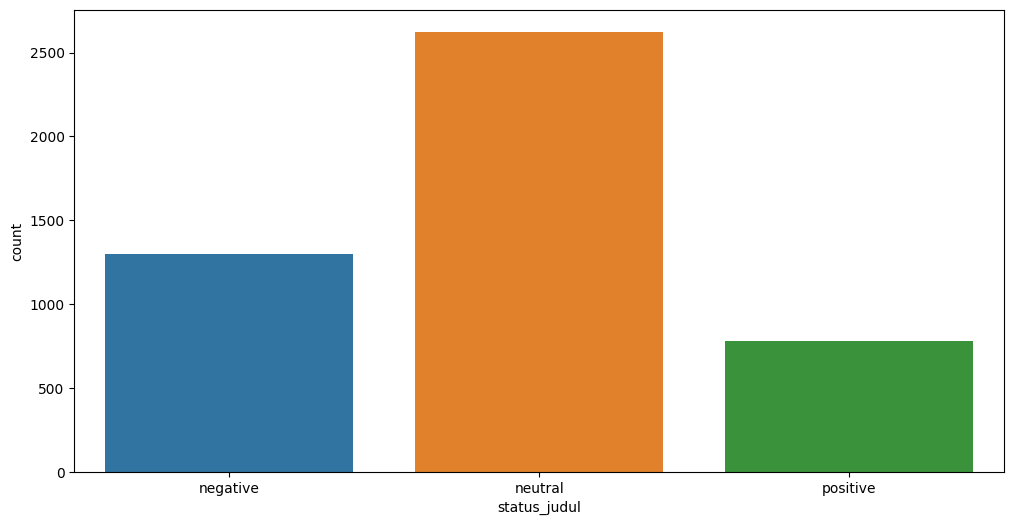

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'status_judul', data = data)

<Axes: xlabel='status_narasi', ylabel='count'>

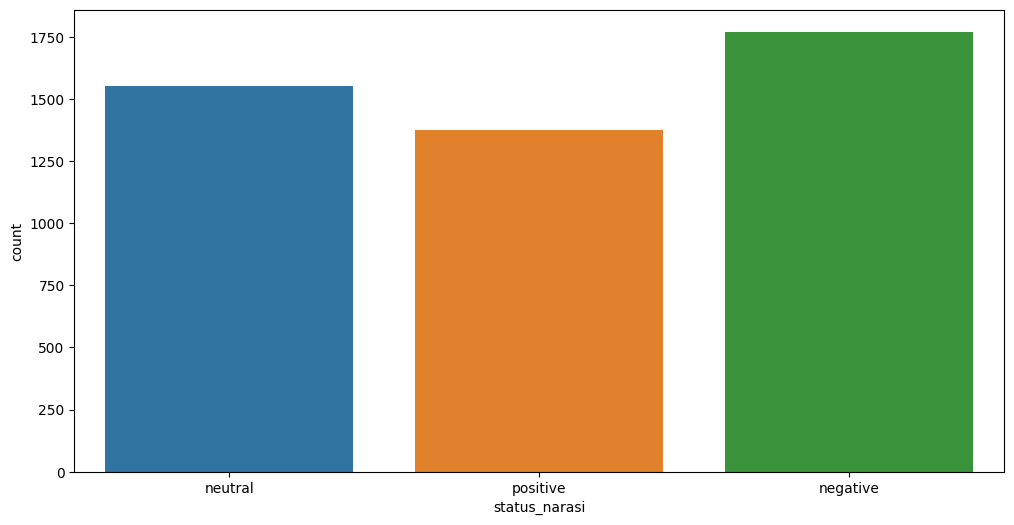

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'status_narasi', data = data)

In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1wRNzmgsdxTgnKLIxyg8LHLDwcIPYL1Rt"

path = '/content/posi.csv'

try:
  posi = pd.read_csv(path, header=None)

except:
  gdown.download(url, path, quiet=False)
  posi = pd.read_csv(path, header=None)

Downloading...
From: https://drive.google.com/uc?id=1wRNzmgsdxTgnKLIxyg8LHLDwcIPYL1Rt
To: /content/posi.csv
100%|██████████| 12.3k/12.3k [00:00<00:00, 22.0MB/s]


In [ ]:
import gdown
url = "https://drive.google.com/uc?id=10ZezszUPsEg2cn2i07LCbRR8l9qbXTOc"

path = '/content/nega.csv'

try:
  nega = pd.read_csv(path, header=None)

except:
  gdown.download(url, path, quiet=False)
  nega = pd.read_csv(path, header=None)

Downloading...
From: https://drive.google.com/uc?id=10ZezszUPsEg2cn2i07LCbRR8l9qbXTOc
To: /content/nega.csv
100%|██████████| 25.3k/25.3k [00:00<00:00, 46.5MB/s]


In [ ]:
def count_positive_words(sentence, positive_words):
    return sum(word in sentence for word in positive_words)

# Function to count negative words in a sentence
def count_negative_words(sentence, negative_words):
    return sum(word in sentence for word in negative_words)

In [ ]:
data['judul_clean_string'] = data['judul_clean_string'].astype(str)
data['narasi_clean_string'] = data['narasi_clean_string'].astype(str)
posi[0] = posi[0].astype(str)
nega[0] = nega[0].astype(str)

In [ ]:
data['Positive_Count_Judul'] = data['judul_clean_string'].apply(lambda x: count_positive_words(x, posi[0]))
data['Negative_Count_Judul'] = data['judul_clean_string'].apply(lambda x: count_negative_words(x, nega[0]))

In [ ]:
data['Positive_Count_Narasi'] = data['narasi_clean_string'].apply(lambda x: count_positive_words(x, posi[0]))
data['Negative_Count_Narasi'] = data['narasi_clean_string'].apply(lambda x: count_negative_words(x, nega[0]))

Text(0.5, 1.0, 'Presentase Sentimen pada Narasi Berita Hoax')

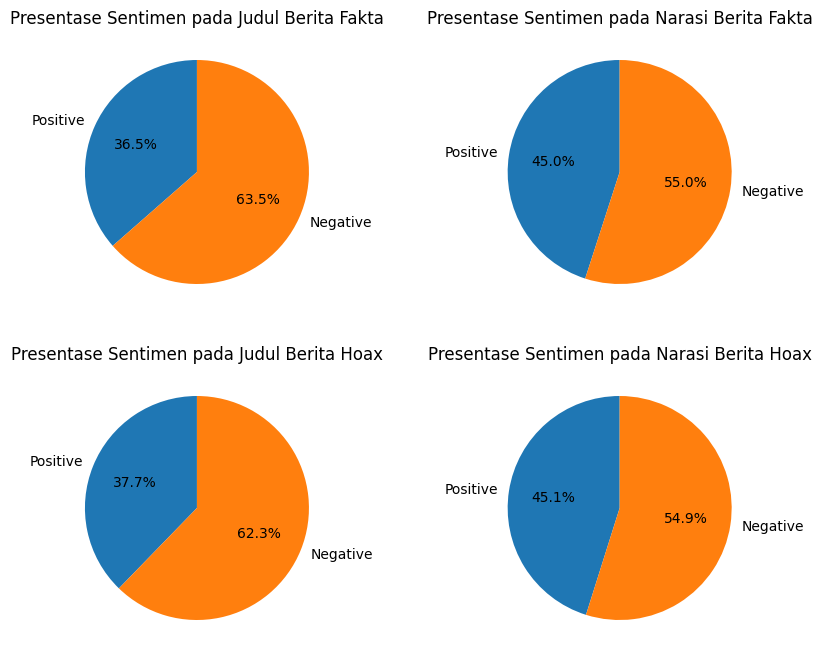

In [ ]:
#Membuat data
sentimen_judul_fakta = data[data['label']==0][['Positive_Count_Judul','Negative_Count_Judul']]
sentimen_narasi_fakta = data[data['label']==0][['Positive_Count_Narasi','Negative_Count_Narasi']]
sentimen_judul_hoax = data[data['label']==1][['Positive_Count_Judul','Negative_Count_Judul']]
sentimen_narasi_hoax = data[data['label']==1][['Positive_Count_Narasi','Negative_Count_Narasi']]

# Sum each column
sum_positive1 = sentimen_judul_fakta['Positive_Count_Judul'].sum()
sum_negative1 = sentimen_judul_fakta['Negative_Count_Judul'].sum()
sum_positive2 = sentimen_narasi_fakta['Positive_Count_Narasi'].sum()
sum_negative2 = sentimen_narasi_fakta['Negative_Count_Narasi'].sum()
sum_positive3 = sentimen_judul_hoax['Positive_Count_Judul'].sum()
sum_negative3 = sentimen_judul_hoax['Negative_Count_Judul'].sum()
sum_positive4 = sentimen_narasi_hoax['Positive_Count_Narasi'].sum()
sum_negative4 = sentimen_narasi_hoax['Negative_Count_Narasi'].sum()

labels = ['Positive', 'Negative']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].pie([sum_positive1, sum_negative1], labels=labels, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Presentase Sentimen pada Judul Berita Fakta')

axs[0, 1].pie([sum_positive2, sum_negative2], labels=labels, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Presentase Sentimen pada Narasi Berita Fakta')

axs[1, 0].pie([sum_positive3, sum_negative3], labels=labels, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Presentase Sentimen pada Judul Berita Hoax')

axs[1, 1].pie([sum_positive4, sum_negative4], labels=labels, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Presentase Sentimen pada Narasi Berita Hoax')

In [ ]:
data.to_csv("Text_Preprocessing_complete.csv")

#Pembagian dataset

In [40]:
import pandas as pd
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

In [34]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True, smooth_idf =True)
    vector.fit(train_fit)
    return vector

In [35]:
tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [38]:
X_judul

<4701x6964 sparse matrix of type '<class 'numpy.float64'>'
	with 30942 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.model_selection import train_test_split

x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
print(x_train_judul.shape, x_test_judul.shape)

(3760, 6964) (941, 6964)


In [ ]:
tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
print(x_train_narasi.shape, x_test_narasi.shape)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_train_res_judul, y_train_res_judul = rus.fit_sample(x_train_judul, y_train_judul)
x_test_res_judul, y_test_res_judul = rus.fit_sample(x_test_judul, y_test_judul)

#Modeling

##Regresi Logistik

###Judul

####Tanpa hyperparameter

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
print(x_train_judul.shape, x_test_judul.shape)

(3760, 6964) (941, 6964)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR_judul = LogisticRegression()
scoreLR_judul = cross_val_score(modelLR_judul, x_train_judul, y_train_judul, cv=5)

print(scoreLR_judul)
print(np.mean(scoreLR_judul))

[0.82712766 0.82978723 0.8337766  0.83510638 0.83909574]
0.8329787234042554


Untuk skor model ketika melakukan cross validation mendapat skor paling tinggi sebesar 83.64% dengan nilai rata-rata 83.19%

In [ ]:
modelLR_judul.fit(x_train_judul,y_train_judul)
y_predLR_init_judul = modelLR_judul.predict(x_test_judul)

In [ ]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test_judul,y_predLR_init_judul),"\n")
print(classification_report(y_test_judul,y_predLR_init_judul))

dapat dilihat bahwa model logistik tanpa hyperparameter ini memiliki nilai akurasi judul sebesar 84%

####dengan hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [
  {'penalty': ['l1', 'l2',"elasticnet", 'none'], 'solver': ['saga']},
  {'penalty': ['l2', 'none'], 'solver': ['sag']},
  {"penalty" : ["l1", "l2","none"], "solver" :["iblinear"]},
  {"penalty" : ["l2","none"], "solver" :["lbfgs"]},
  {"penalty" : ["l2","none"], "solver" :["newton-cg"]},
  {"penalty" : ["l2","none"], "solver" :["newton-cholesky"]}
 ]

In [ ]:
modelLR1_judul = GridSearchCV(modelLR_judul, parameters, cv=5)
modelLR1_judul.fit(x_train_judul, y_train_judul)

In [ ]:
print("best parameters: {}".format(modelLR1_judul.best_params_))
print("best score:      {:0.5f}".format(modelLR1_judul.best_score_))

In [ ]:
modelLR_judul_final = LogisticRegression(solver = "saga", penalty="l1")
modelLR_judul_final.fit(x_train_judul,y_train_judul)
y_predLR_judul = modelLR_judul_final.predict(x_test_judul)

In [ ]:
print("Hasil pemodelan dengan parameter terbaik")
print(confusion_matrix(y_test_judul,y_predLR_judul),"\n")
print(classification_report(y_test_judul,y_predLR_judul))

dapat dilihat bahwa model logistik dengan parameter terbaik ini memiliki nilai akurasi judul sebesar 87%

###Narasi

####Tanpa hyperparameter

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
print(x_train_narasi.shape, x_test_narasi.shape)

(3760, 12921) (941, 12921)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR_narasi = LogisticRegression()
scoreLR_narasi = cross_val_score(modelLR_narasi, x_train_narasi, y_train_narasi, cv=5)

print(scoreLR_narasi)
print(np.mean(scoreLR_narasi))

[0.82446809 0.81781915 0.81781915 0.82446809 0.82712766]
0.8223404255319149


Untuk skor model ketika melakukan cross validation mendapat skor paling tinggi sebesar 82.71% dengan nilai rata-rata 82.2%

In [ ]:
modelLR_narasi.fit(x_train_narasi,y_train_narasi)
y_predLR_init_narasi = modelLR_narasi.predict(x_test_narasi)

In [ ]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test_narasi,y_predLR_init_narasi),"\n")
print(classification_report(y_test_narasi,y_predLR_init_narasi))

Hasil pemodelan tanpa parameter terbaik
[[  5 159]
 [  3 774]] 

              precision    recall  f1-score   support

           0       0.62      0.03      0.06       164
           1       0.83      1.00      0.91       777

    accuracy                           0.83       941
   macro avg       0.73      0.51      0.48       941
weighted avg       0.79      0.83      0.76       941



dapat dilihat bahwa model logistik tanpa hyperparameter ini memiliki nilai akurasi narasi sebesar 83%

####dengan hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [
  {'penalty': ['l1', 'l2',"elasticnet", 'none'], 'solver': ['saga']},
  {'penalty': ['l2', 'none'], 'solver': ['sag']},
  {"penalty" : ["l1", "l2","none"], "solver" :["iblinear"]},
  {"penalty" : ["l2","none"], "solver" :["lbfgs"]},
  {"penalty" : ["l2","none"], "solver" :["newton-cg"]},
  {"penalty" : ["l2","none"], "solver" :["newton-cholesky"]}
 ]

In [ ]:
modelLR1_narasi = GridSearchCV(modelLR_narasi, parameters, cv=5)
modelLR1_narasi.fit(x_train_narasi, y_train_narasi)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['saga']},
                         {'penalty': ['l2', 'none'], 'solver': ['sag']},
                         {'penalty': ['l1', 'l2', 'none'],
                          'solver': ['iblinear']},
                         {'penalty': ['l2', 'none'], 'solver': ['lbfgs']},
                         {'penalty': ['l2', 'none'], 'solver': ['newton-cg']},
                         {'penalty': ['l2', 'none'],
                          'solver': ['newton-cholesky']}])

In [ ]:
print("best parameters: {}".format(modelLR1_narasi.best_params_))
print("best score:      {:0.5f}".format(modelLR1_narasi.best_score_))

best parameters: {'penalty': 'l1', 'solver': 'saga'}
best score:      0.82394


In [ ]:
modelLR_narasi_final = LogisticRegression(solver = "saga", penalty="l1")
modelLR_narasi_final.fit(x_train_narasi,y_train_narasi)
y_predLR_narasi = modelLR_narasi_final.predict(x_test_narasi)

In [ ]:
print("Hasil pemodelan dengan parameter terbaik")
print(confusion_matrix(y_test_narasi,y_predLR_narasi),"\n")
print(classification_report(y_test_narasi,y_predLR_narasi))

Hasil pemodelan dengan parameter terbaik
[[ 10 154]
 [  8 769]] 

              precision    recall  f1-score   support

           0       0.56      0.06      0.11       164
           1       0.83      0.99      0.90       777

    accuracy                           0.83       941
   macro avg       0.69      0.53      0.51       941
weighted avg       0.78      0.83      0.77       941



dapat dilihat bahwa akurasi narasi model logistik dengan parameter terbaik ini memiliki nilai akurasi sebesar 83%

##KNN

###judul

####tanpa hyperparameter

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train_judul, y_train_judul)

# Predict on dataset which model has not seen before
print(knn.predict(x_test_judul))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# Calculate the accuracy of the model
print(knn.score(x_test_judul, y_test_judul))

0.8235919234856536


akurasi judul model knn tanpa hyperparameter = 82.36%

####Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {'n_neighbors' : list(range(1, 100)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan',"hamming","chebyshev",'mahalanobis']}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
gs_judul = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, scoring='accuracy', return_train_score=False)
gs_judul_res = gs_judul.fit(x_train_judul,y_train_judul)

In [ ]:
# find the best score
gs_judul_res.best_score_

0.8335104733222933

In [ ]:
# get the hyperparameters with the best score
gs_judul_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 70, 'weights': 'uniform'}

In [ ]:
# use the best hyperparameters
knn_judul = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn_judul.fit(x_train_judul, y_train_judul)

KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')

In [ ]:
# get a prediction
y_hat_judul = knn_judul.predict(x_train_judul)
y_knn_judul = knn_judul.predict(x_test_judul)

In [ ]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train_judul, y_hat_judul))
print('Test set accuracy: ',metrics.accuracy_score(y_test_judul, y_knn_judul))

Training set accuracy:  0.9997340425531915
Test set accuracy:  0.8384697130712009


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_judul, y_knn_judul))

[[ 18 146]
 [  6 771]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_judul, y_knn_judul))

              precision    recall  f1-score   support

           0       0.75      0.11      0.19       164
           1       0.84      0.99      0.91       777

    accuracy                           0.84       941
   macro avg       0.80      0.55      0.55       941
weighted avg       0.82      0.84      0.79       941



akurasi judul dari model KNN dengan hyperparameter = 84%

In [ ]:
from sklearn.model_selection import cross_val_score
scores_judul = cross_val_score(knn_judul, X_judul, y, cv =3)

In [ ]:
print('Model accuracy: ',np.mean(scores_judul))

Model accuracy:  0.8251435864709636


###narasi

####tanpa hyperparameter

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train_narasi, y_train_narasi)

# Predict on dataset which model has not seen before
print(knn.predict(x_test_narasi))

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 

In [ ]:
# Calculate the accuracy of the model
print(knn.score(x_test_narasi, y_test_narasi))

0.8087141339001063


akurasi narasi dengan model knn tanpa hyperparameter = 80.87%

####Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {'n_neighbors' : list(range(1, 100)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan',"hamming","chebyshev",'mahalanobis']}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
gs_narasi = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, scoring='accuracy', return_train_score=False)
gs_narasi_res = gs_narasi.fit(x_train_narasi,y_train_narasi)

In [ ]:
# find the best score
gs_narasi_res.best_score_

0.8265948008670737

In [ ]:
# get the hyperparameters with the best score
gs_narasi_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 22, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn_narasi = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn_narasi.fit(x_train_narasi, y_train_narasi)

KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')

In [ ]:
# get a prediction
y_hat_narasi = knn_narasi.predict(x_train_narasi)
y_knn_narasi = knn_narasi.predict(x_test_narasi)

In [ ]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train_narasi, y_hat_narasi))
print('Test set accuracy: ',metrics.accuracy_score(y_test_narasi, y_knn_narasi))

Training set accuracy:  0.9986702127659575
Test set accuracy:  0.824654622741764


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_narasi, y_knn_narasi))

[[ 20 144]
 [ 21 756]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_narasi, y_knn_narasi))

              precision    recall  f1-score   support

           0       0.49      0.12      0.20       164
           1       0.84      0.97      0.90       777

    accuracy                           0.82       941
   macro avg       0.66      0.55      0.55       941
weighted avg       0.78      0.82      0.78       941



In [ ]:
from sklearn.model_selection import cross_val_score
scores_narasi = cross_val_score(knn_narasi, X_narasi, y, cv =3)

In [ ]:
print('Model accuracy: ',np.mean(scores_narasi))

Model accuracy:  0.816847479259732


##Decision tree

###judul

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini_judul(x_train_judul, x_test_judul, y_train_judul):

    # Creating the classifier object
    clf_gini_judul = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini_judul.fit(x_train_judul, y_train_judul)
    return clf_gini_judul

# Function to perform training with entropy.
def tarin_using_entropy_judul(x_train_judul, x_test_judul, y_train_judul):

    # Decision tree with entropy
    clf_entropy_judul = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy_judul.fit(x_train_judul, y_train_judul)
    return clf_entropy_judul


# Function to make predictions
def prediction(x_test_judul, clf_object_judul):

    # Predicton on test with giniIndex
    y_pred_judul = clf_object_judul.predict(x_test_judul)
    print("Predicted values:")
    print(y_pred_judul)
    return y_pred_judul

# Function to calculate accuracy
def cal_accuracy(y_test_judul, y_pred_judul):

    print("Confusion Matrix: ",
        confusion_matrix(y_test_judul, y_pred_judul))

    print ("Accuracy : ",
    accuracy_score(y_test_judul,y_pred_judul)*100)

    print("Report : ",
    classification_report(y_test_judul, y_pred_judul))

# Driver code
def main():

    # Building Phase
    clf_gini_judul = train_using_gini_judul(x_train_judul, x_test_judul, y_train_judul)
    clf_entropy_judul = tarin_using_entropy_judul(x_train_judul, x_test_judul, y_train_judul)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini_judul = prediction(x_test_judul, clf_gini_judul)
    cal_accuracy(y_test_judul, y_pred_gini_judul)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy_judul = prediction(x_test_judul, clf_entropy_judul)
    cal_accuracy(y_test_judul, y_pred_entropy_judul)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1

###narasi

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini_narasi(x_train_narasi, x_test_narasi, y_train_narasi):

    # Creating the classifier object
    clf_gini_narasi = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini_narasi.fit(x_train_narasi, y_train_narasi)
    return clf_gini_narasi

# Function to perform training with entropy.
def tarin_using_entropy_narasi(x_train_narasi, x_test_narasi, y_train_narasi):

    # Decision tree with entropy
    clf_entropy_narasi = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy_narasi.fit(x_train_narasi, y_train_narasi)
    return clf_entropy_narasi


# Function to make predictions
def prediction(x_test_narasi, clf_object_narasi):

    # Predicton on test with giniIndex
    y_pred_narasi = clf_object_narasi.predict(x_test_narasi)
    print("Predicted values:")
    print(y_pred_narasi)
    return y_pred_narasi

# Function to calculate accuracy
def cal_accuracy(y_test_narasi, y_pred_narasi):

    print("Confusion Matrix: ",
        confusion_matrix(y_test_narasi, y_pred_narasi))

    print ("Accuracy : ",
    accuracy_score(y_test_narasi,y_pred_narasi)*100)

    print("Report : ",
    classification_report(y_test_narasi, y_pred_narasi))

# Driver code
def main():

    # Building Phase
    clf_gini_narasi = train_using_gini_narasi(x_train_narasi, x_test_narasi, y_train_narasi)
    clf_entropy_narasi = tarin_using_entropy_narasi(x_train_narasi, x_test_narasi, y_train_narasi)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini_narasi = prediction(x_test_narasi, clf_gini_narasi)
    cal_accuracy(y_test_narasi, y_pred_gini_narasi)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy_narasi = prediction(x_test_narasi, clf_entropy_narasi)
    cal_accuracy(y_test_narasi, y_pred_entropy_narasi)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

##Naive bayes

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_judul = GaussianNB()
gnb_judul.fit(x_train_judul.toarray(), y_train_judul)

# making predictions on the testing set
y_pred_judul = gnb_judul.predict(x_test_judul.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_judul, y_pred_judul))

Gaussian Naive Bayes model accuracy(in %): 0.6546227417640808


###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_narasi = GaussianNB()
gnb_narasi.fit(x_train_narasi.toarray(), y_train_narasi)

# making predictions on the testing set
y_pred_narasi = gnb_narasi.predict(x_test_narasi.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_narasi, y_pred_narasi))

Gaussian Naive Bayes model accuracy(in %): 0.7109458023379384


##Random Forest

###judul

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=15,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X_judul, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished


RandomForestRegressor(max_depth=15, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [ ]:
regressor.oob_score_

0.1824318691096386

In [ ]:
scoreRF_judul = cross_val_score(regressor, x_train_judul, y_train_judul, cv=10)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.0s
[Parall

In [ ]:
print(scoreRF_judul)
print("akurasi rata-rata : ",np.mean(scoreRF_judul))

[0.14679254 0.22318638 0.17905731 0.11680809 0.08575734 0.1987549
 0.21126998 0.18563056 0.27940544 0.2447138 ]
akurasi rata-rata :  0.18713763363071195


In [ ]:
regressor.fit(x_train_judul, y_train_judul)
y_predRF_init_judul = regressor.predict(x_test_judul)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
print(confusion_matrix(y_test_judul,np.round(abs(y_predRF_init_judul))),"\n")
print(classification_report(y_test_judul,np.round(abs(y_predRF_init_judul))))

[[ 50 114]
 [ 13 764]] 

              precision    recall  f1-score   support

           0       0.79      0.30      0.44       164
           1       0.87      0.98      0.92       777

    accuracy                           0.87       941
   macro avg       0.83      0.64      0.68       941
weighted avg       0.86      0.87      0.84       941



###narasi

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X_narasi, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [ ]:
regressor.oob_score_

0.05653510119309246

In [ ]:
scoreRF_narasi = cross_val_score(regressor, x_train_narasi, y_train_narasi, cv=5)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.1s
[Parall

In [ ]:
print(scoreRF_narasi)
print("akurasi rata-rata : ",np.mean(scoreRF_narasi))

[0.08121547 0.03480236 0.04181495 0.0674654  0.06481982]
akurasi rata-rata :  0.058023599947651675


In [ ]:
regressor.fit(x_train_narasi, y_train_narasi)
y_predRF_init_narasi = regressor.predict(x_test_narasi)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
print(confusion_matrix(y_test_narasi,np.round(abs(y_predRF_init_narasi))),"\n")
print(classification_report(y_test_narasi,np.round(abs(y_predRF_init_narasi))))

[[ 13 151]
 [  9 768]] 

              precision    recall  f1-score   support

           0       0.59      0.08      0.14       164
           1       0.84      0.99      0.91       777

    accuracy                           0.83       941
   macro avg       0.71      0.53      0.52       941
weighted avg       0.79      0.83      0.77       941



##SVM

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import svm

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

In [ ]:
SVM_judul = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM_judul.fit(x_train_judul, y_train_judul)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM_judul = SVM_judul.predict(x_test_judul)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM_judul, y_test_judul))

[LibSVM]SVM Accuracy Score ->  0.869287991498406


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_judul, predictions_SVM_judul)

array([[ 51, 113],
       [ 10, 767]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_judul, predictions_SVM_judul))

              precision    recall  f1-score   support

           0       0.84      0.31      0.45       164
           1       0.87      0.99      0.93       777

    accuracy                           0.87       941
   macro avg       0.85      0.65      0.69       941
weighted avg       0.87      0.87      0.84       941



###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import svm

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

In [ ]:
SVM_narasi = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM_narasi.fit(x_train_narasi, y_train_narasi)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM_narasi = SVM_narasi.predict(x_test_narasi)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM_narasi, y_test_narasi))

[LibSVM]SVM Accuracy Score ->  0.8289054197662061


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_narasi, predictions_SVM_narasi)

array([[ 16, 148],
       [ 13, 764]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_narasi, predictions_SVM_narasi))

              precision    recall  f1-score   support

           0       0.55      0.10      0.17       164
           1       0.84      0.98      0.90       777

    accuracy                           0.83       941
   macro avg       0.69      0.54      0.54       941
weighted avg       0.79      0.83      0.78       941



##Gradient boost

###judul

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

# Fit train data to GBC

gbc.fit(x_train_judul,y_train_judul)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test_judul, gbc.predict(x_test_judul)))

[[  0 164]
 [  0 777]]


In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test_judul, gbc.predict(x_test_judul)))

GBC accuracy is 0.83


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(x_test_judul)

print(classification_report(y_test_judul, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.83      1.00      0.90       777

    accuracy                           0.83       941
   macro avg       0.41      0.50      0.45       941
weighted avg       0.68      0.83      0.75       941



###narasi

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

# Fit train data to GBC

gbc.fit(x_train_narasi,y_train_narasi)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test_narasi, gbc.predict(x_test_narasi)))

[[  0 164]
 [  0 777]]


In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test_narasi, gbc.predict(x_test_narasi)))

GBC accuracy is 0.83


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(x_test_narasi)

print(classification_report(y_test_narasi, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.83      1.00      0.90       777

    accuracy                           0.83       941
   macro avg       0.41      0.50      0.45       941
weighted avg       0.68      0.83      0.75       941



##XGboost

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 6, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train_judul, y_train_judul)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, cv=5, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, nthread=4, ...)

In [ ]:
y_pred_judul = xgb_model.predict(x_test_judul)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_judul, y_pred_judul)

In [ ]:
# Evaluate the model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_judul, y_pred_judul)
precision = precision_score(y_test_judul, y_pred_judul)
recall = recall_score(y_test_judul, y_pred_judul)
f1 = f1_score(y_test_judul, y_pred_judul)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.87
Recall: 0.98
F1-Score: 0.92


###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 1, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train_narasi, y_train_narasi)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, cv=5, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, nthread=4, ...)

In [ ]:
y_pred_narasi = xgb_model.predict(x_test_narasi)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_narasi, y_pred_narasi)

In [ ]:
# Evaluate the model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_narasi, y_pred_narasi)
precision = precision_score(y_test_narasi, y_pred_narasi)
recall = recall_score(y_test_narasi, y_pred_narasi)
f1 = f1_score(y_test_narasi, y_pred_narasi)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.84
Recall: 0.98
F1-Score: 0.91


##Light GBM

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb
import pandas as pd
import numpy as np

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

clf_judul = lgb.LGBMClassifier()
clf_judul.fit(x_train_judul, y_train_judul)

y_pred_judul=clf_judul.predict(x_test_judul)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_judul, y_test_judul)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_judul, y_pred_judul)))

[LightGBM] [Info] Number of positive: 3073, number of negative: 687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3165
[LightGBM] [Info] Number of data points in the train set: 3760, number of used features: 201
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817287 -> initscore=1.498075
[LightGBM] [Info] Start training from score 1.498075
LightGBM Model accuracy score: 0.8565


###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

clf_narasi = lgb.LGBMClassifier()
clf_narasi.fit(x_train_narasi, y_train_narasi)

y_pred_narasi=clf_narasi.predict(x_test_narasi)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_narasi, y_test_narasi)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_narasi, y_pred_narasi)))

[LightGBM] [Info] Number of positive: 3073, number of negative: 687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8632
[LightGBM] [Info] Number of data points in the train set: 3760, number of used features: 517
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817287 -> initscore=1.498075
[LightGBM] [Info] Start training from score 1.498075
LightGBM Model accuracy score: 0.8247


##Catboost

###judul

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

# Initialize the CatBoostClassifier object
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(x_train_judul, y_train_judul)

# Predict the target variable on the validation
# set and evaluate the performance
y_pred = model.predict(x_test_judul)
accuracy = (y_pred == np.array(y_test_judul)).mean()
print("Validation Accuracy:", accuracy)

0:	learn: 0.6391485	total: 89ms	remaining: 8.81s
1:	learn: 0.5954872	total: 130ms	remaining: 6.39s
2:	learn: 0.5639761	total: 166ms	remaining: 5.37s
3:	learn: 0.5319518	total: 199ms	remaining: 4.78s
4:	learn: 0.5115950	total: 232ms	remaining: 4.42s
5:	learn: 0.4922089	total: 266ms	remaining: 4.17s
6:	learn: 0.4783311	total: 303ms	remaining: 4.02s
7:	learn: 0.4659741	total: 337ms	remaining: 3.87s
8:	learn: 0.4564407	total: 370ms	remaining: 3.74s
9:	learn: 0.4495999	total: 403ms	remaining: 3.62s
10:	learn: 0.4403208	total: 437ms	remaining: 3.54s
11:	learn: 0.4347474	total: 470ms	remaining: 3.44s
12:	learn: 0.4300796	total: 507ms	remaining: 3.39s
13:	learn: 0.4264407	total: 541ms	remaining: 3.33s
14:	learn: 0.4222397	total: 574ms	remaining: 3.25s
15:	learn: 0.4183578	total: 609ms	remaining: 3.2s
16:	learn: 0.4155032	total: 647ms	remaining: 3.16s
17:	learn: 0.4132380	total: 684ms	remaining: 3.12s
18:	learn: 0.4112444	total: 749ms	remaining: 3.19s
19:	learn: 0.4093420	total: 803ms	remaining

###narasi

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

# Initialize the CatBoostClassifier object
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(x_train_narasi, y_train_narasi)

# Predict the target variable on the validation
# set and evaluate the performance
y_pred = model.predict(x_test_narasi)
accuracy = (y_pred == np.array(y_test_narasi)).mean()
print("Validation Accuracy:", accuracy)

0:	learn: 0.6472192	total: 187ms	remaining: 18.5s
1:	learn: 0.6094908	total: 269ms	remaining: 13.2s
2:	learn: 0.5801573	total: 336ms	remaining: 10.9s
3:	learn: 0.5581199	total: 405ms	remaining: 9.73s
4:	learn: 0.5401104	total: 491ms	remaining: 9.33s
5:	learn: 0.5253408	total: 630ms	remaining: 9.87s
6:	learn: 0.5143044	total: 766ms	remaining: 10.2s
7:	learn: 0.5045522	total: 893ms	remaining: 10.3s
8:	learn: 0.4948687	total: 961ms	remaining: 9.71s
9:	learn: 0.4873318	total: 1.03s	remaining: 9.25s
10:	learn: 0.4813106	total: 1.11s	remaining: 8.99s
11:	learn: 0.4758990	total: 1.19s	remaining: 8.71s
12:	learn: 0.4716351	total: 1.26s	remaining: 8.4s
13:	learn: 0.4682725	total: 1.33s	remaining: 8.15s
14:	learn: 0.4650262	total: 1.4s	remaining: 7.95s
15:	learn: 0.4605863	total: 1.47s	remaining: 7.71s
16:	learn: 0.4586893	total: 1.54s	remaining: 7.54s
17:	learn: 0.4559980	total: 1.61s	remaining: 7.34s
18:	learn: 0.4527324	total: 1.68s	remaining: 7.16s
19:	learn: 0.4511590	total: 1.75s	remaining

#Kesimpulan Model

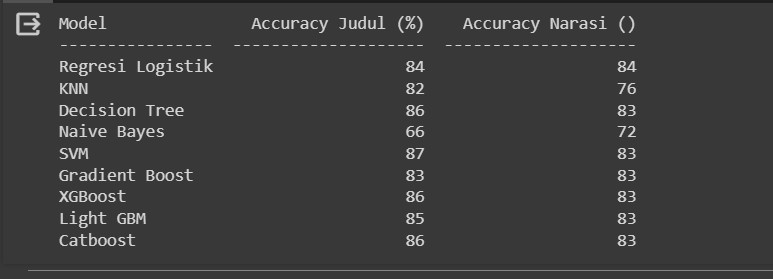

In [54]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/model.jpg")

#visualisasi

##judul

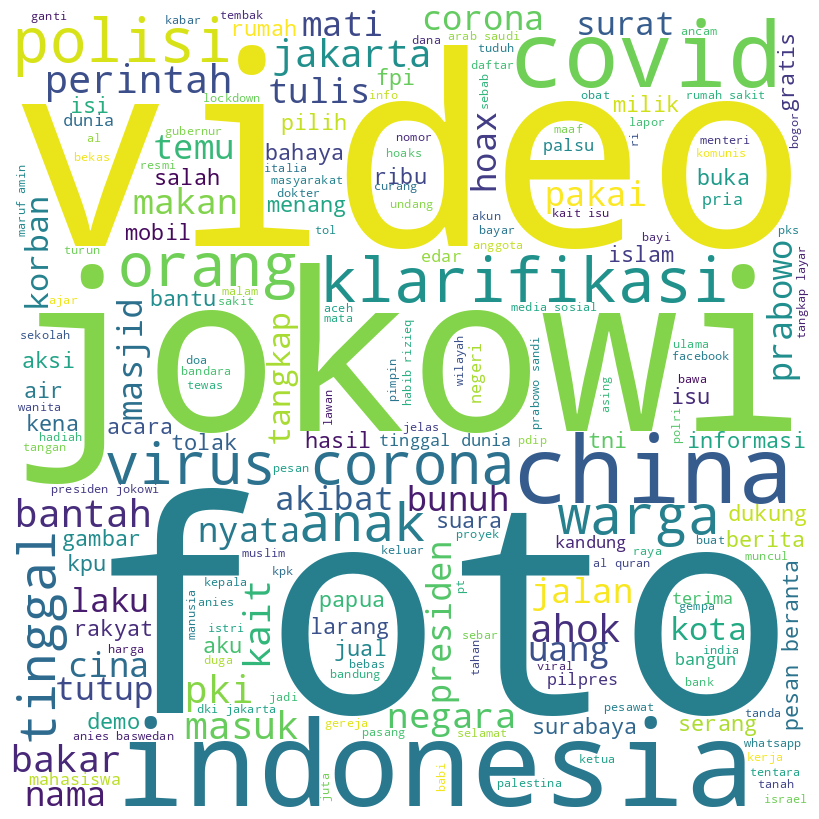

In [41]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data["judul_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Text(0, 0.5, 'Words')

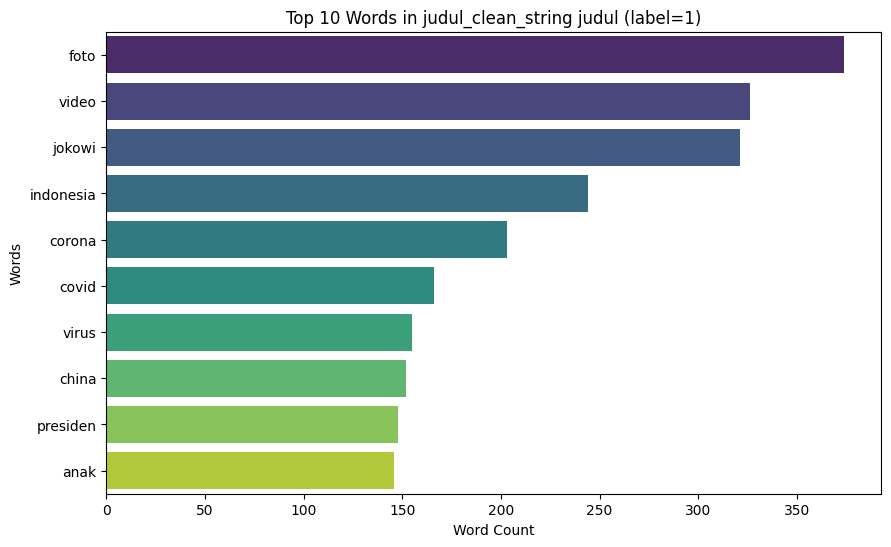

In [49]:
from collections import Counter
judul = data['judul_clean_string']

# Combine all text data into a single string
text_data = " ".join(map(str,judul))

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in judul_clean_string judul (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')


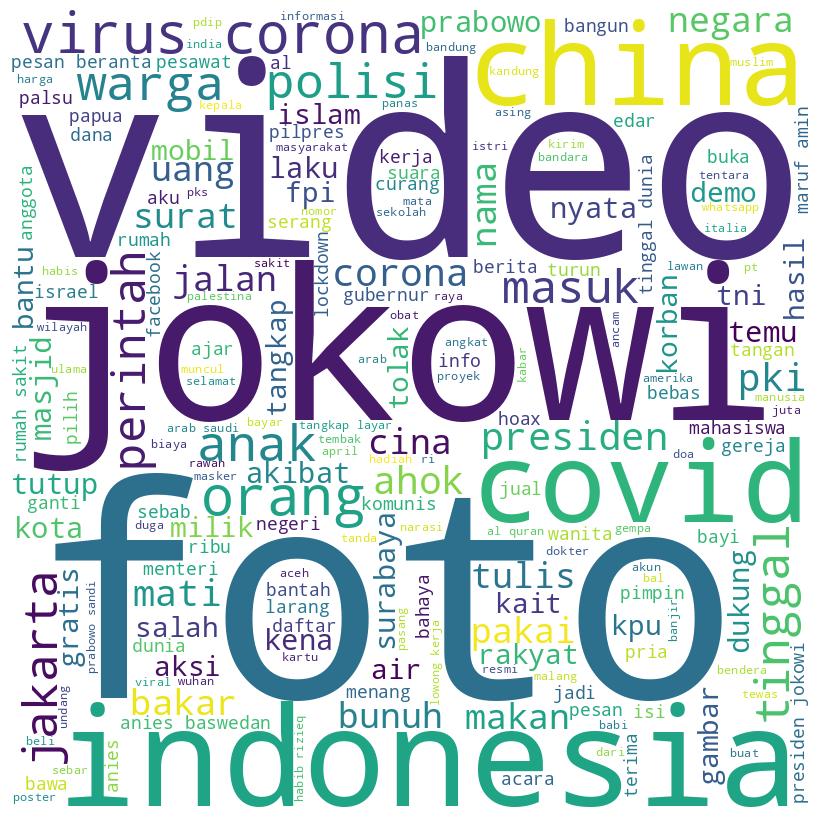

In [50]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data[data["label"]==1]["judul_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Text(0, 0.5, 'Words')

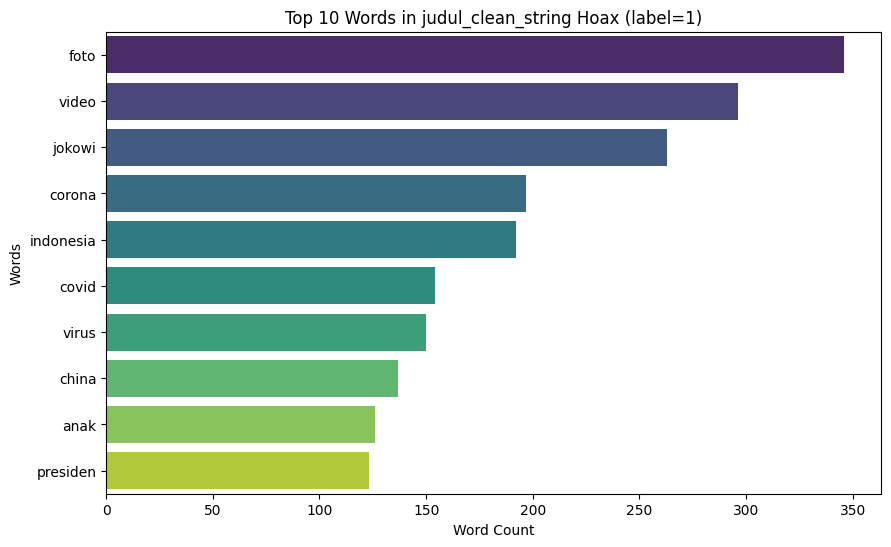

In [51]:
from collections import Counter
hoax = data[data['label'] == 1]['judul_clean_string']

# Combine all text data into a single string
text_data = " ".join(map(str,hoax))

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in judul_clean_string Hoax (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')


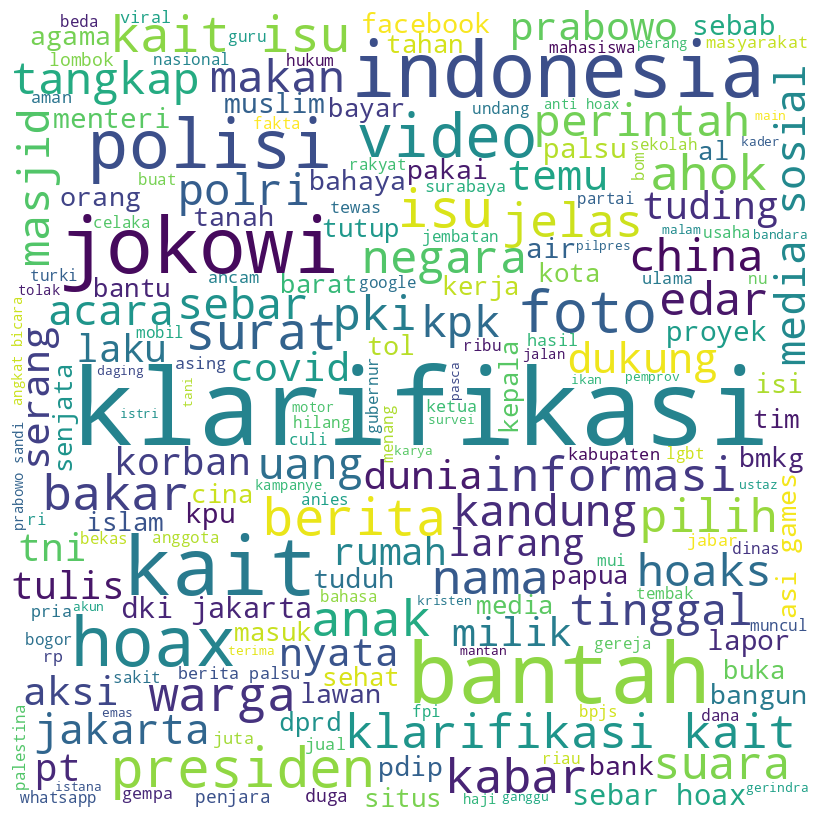

In [52]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data[data["label"]==0]["judul_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Text(0, 0.5, 'Words')

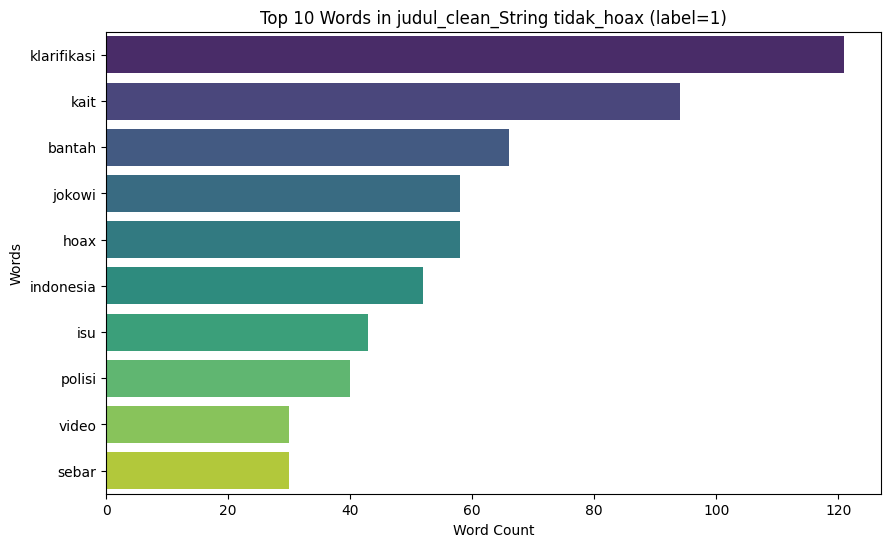

In [53]:
from collections import Counter
tidak_hoax = data[data['label'] == 0]['judul_clean_string']

# Combine all text data into a single string
text_data = " ".join(tidak_hoax)

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(map(str,words))

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in judul_clean_String tidak_hoax (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')


In [ ]:
data[['label','judul_clean_string']].to_csv("judul.csv", index=False, header=False)

In [ ]:
data['judul_clean_string'].to_csv("judul_only.csv", index=False, header=False)

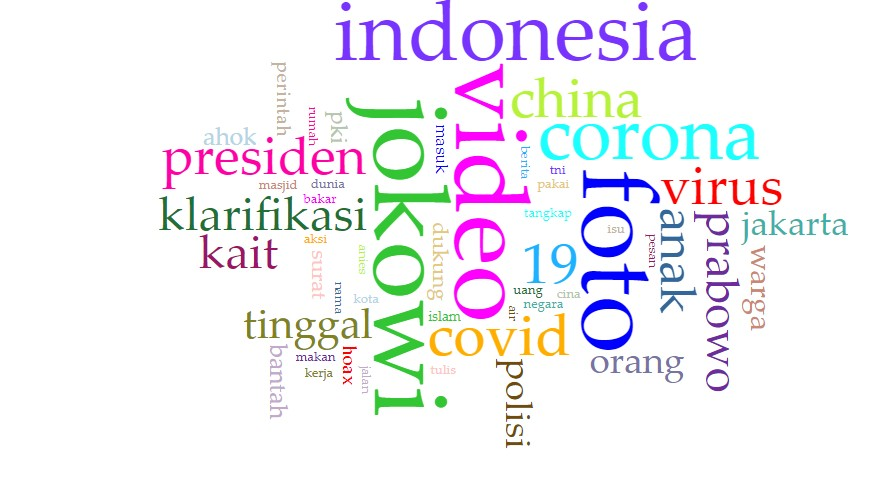

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul.jpg")

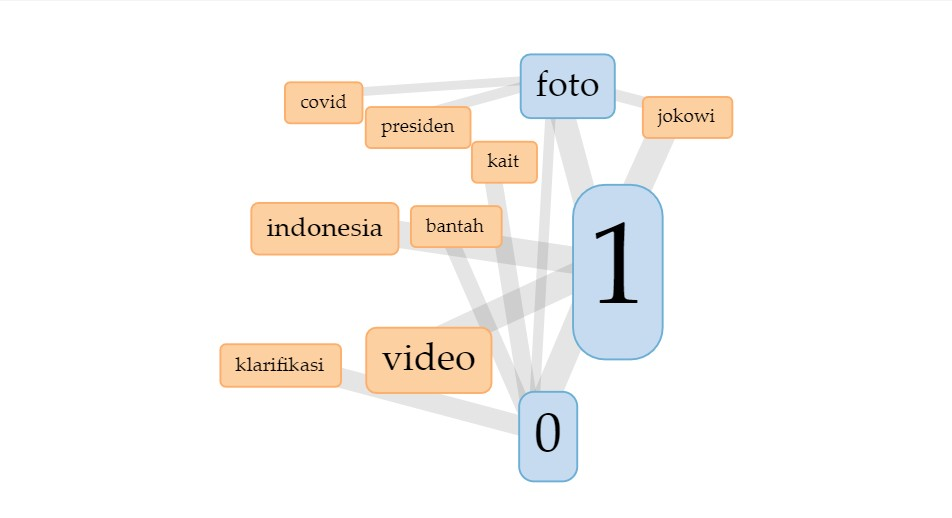

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul2.jpg")

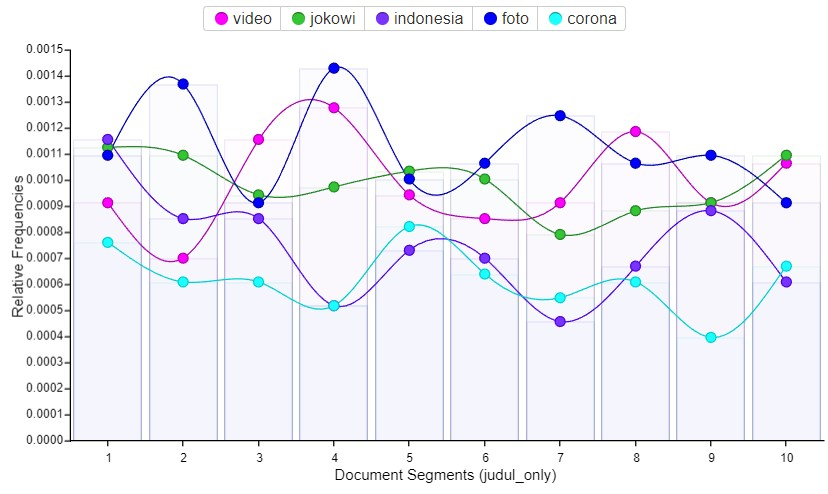

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul3.jpg")

##narasi

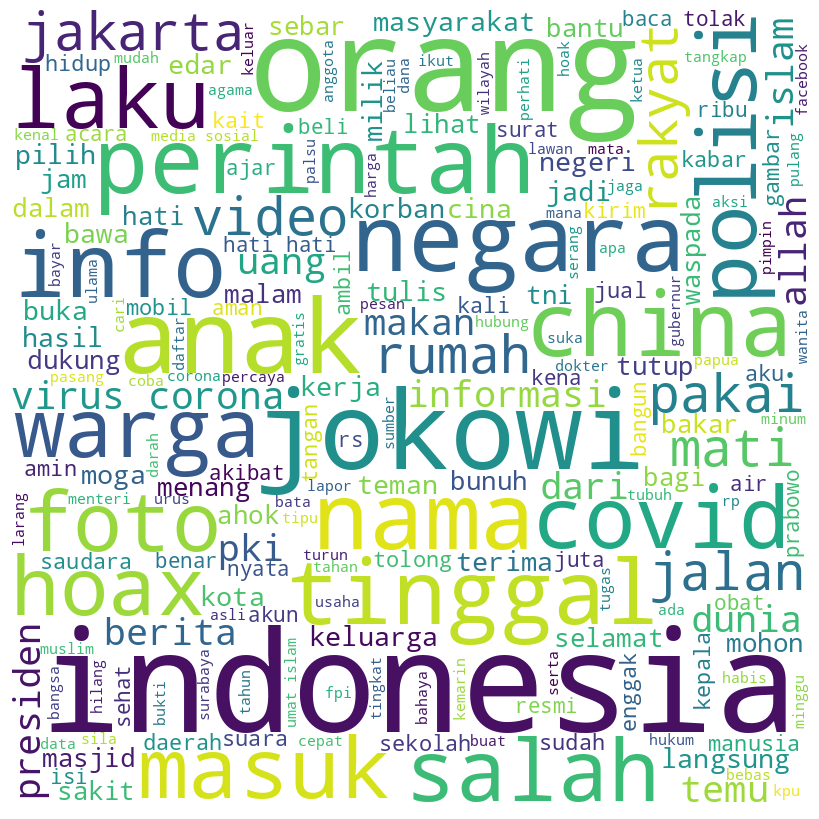

In [45]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data["narasi_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [47]:
narasi = data['narasi_clean_string']

# Combine all text data into a single string
text_data = " ".join(narasi)

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in narasi_clean_string narasi (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')

TypeError: ignored

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data[data["label"]==1]["narasi_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
hoax = data[data['label'] == 1]['narasi_clean_string']

# Combine all text data into a single string
text_data = " ".join(hoax)

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in narasi_clean_string Hoax (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')

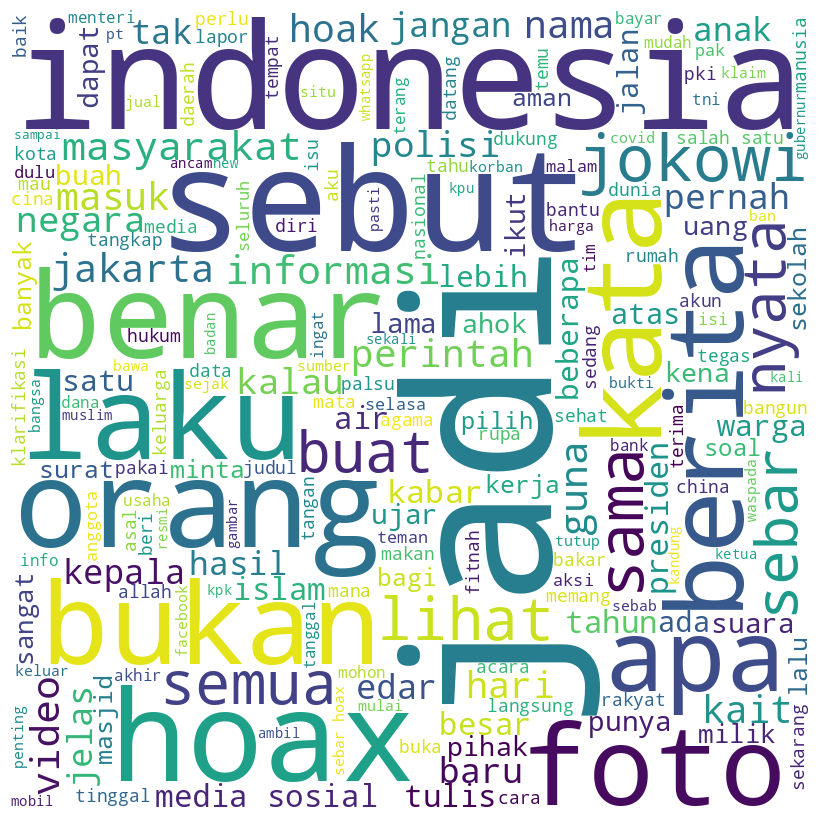

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
data = pd.read_csv("https://github.com/andrinau/data_text_processing/raw/main/Text_Preprocessing_complete.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data[data["label"]==0]["narasi_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
tidak_hoax = data[data['label'] == 0]['judul_clean_string']

# Combine all text data into a single string
text_data = " ".join(tidak_hoax)

# Tokenize the text into words
words = text_data.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 words
top_words = dict(word_counts.most_common(10))

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
plt.title('Top 10 Words in judul_clean_String tidak_hoax (label=1)')
plt.xlabel('Word Count')
plt.ylabel('Words')


In [ ]:
data[['label','narasi_clean_string']].to_csv("narasi.csv", index=False, header=False)

In [ ]:
data['narasi_clean_string'].to_csv("narasi_only.csv", index=False, header=False)

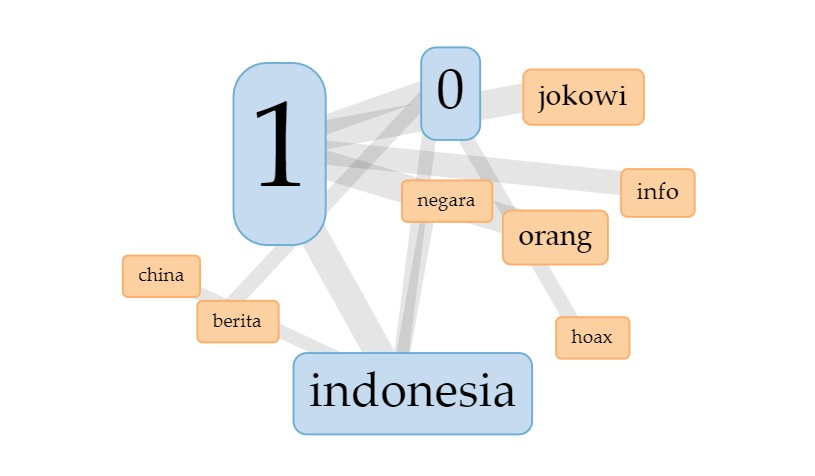

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi.jpg")

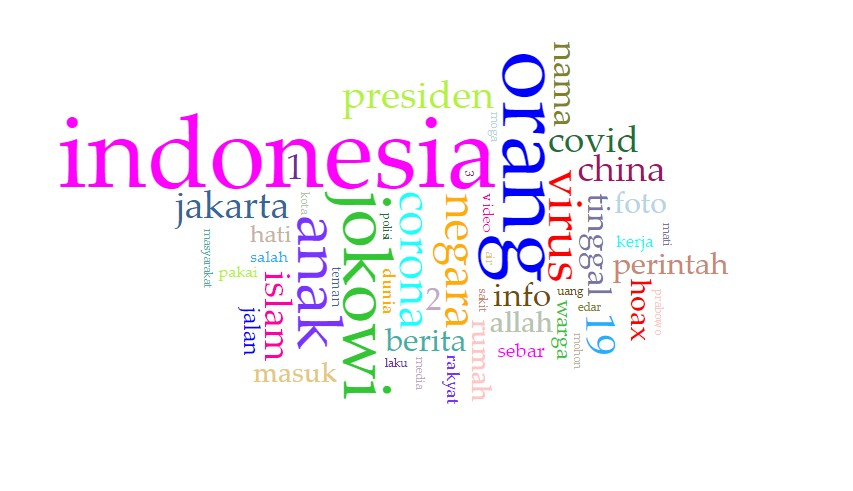

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi2.jpg")

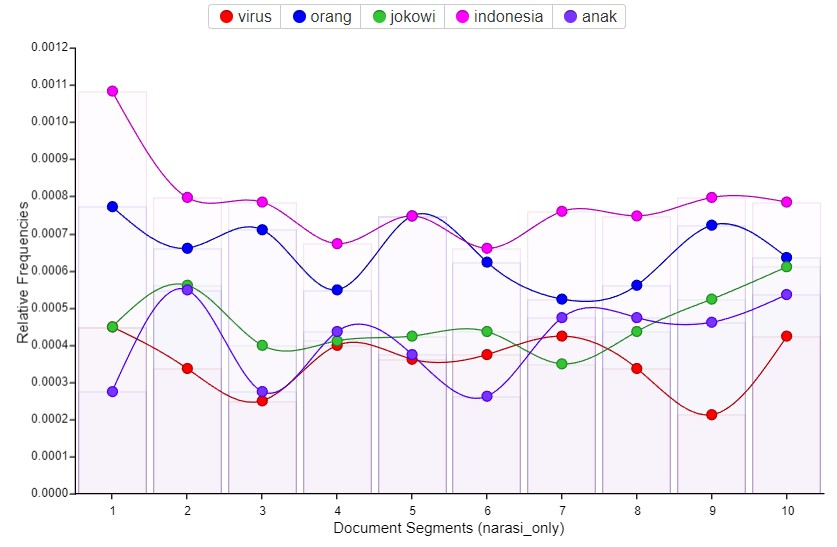

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi3.jpg")